# Z Ground truth

Average Accuracy: 0.94
Average Precision: 0.74
Average Recall: 0.74
Average F1-Score: 0.74
Average Cohen's Kappa: 0.70
Average Jaccard Score: 0.59


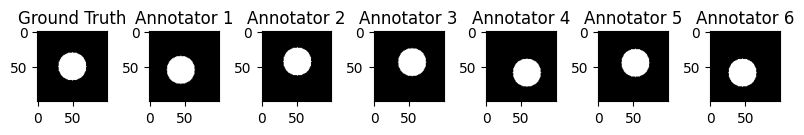

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    cohen_kappa_score,
    accuracy_score,
    jaccard_score,
    f1_score,
    precision_score,
    recall_score,
)


def dice_score(ground_truth, prediction):
    intersection = np.logical_and(ground_truth, prediction)
    dice = 2.0 * np.sum(intersection) / (np.sum(ground_truth) + np.sum(prediction))
    return dice


# Tworzenie symulowanego obrazu
image_size = (100, 100)
ground_truth = np.zeros(image_size)
center = (50, 50)
radius = 20
displacement = 10

for i in range(image_size[0]):
    for j in range(image_size[1]):
        if np.sqrt((i - center[0])**2 + (j - center[1])**2) <= radius:
            ground_truth[i, j] = 1

# Symulacja adnotacji przez adnotatorów
num_annotators = 6
annotations = []

for _ in range(num_annotators):
    annotation = np.zeros(image_size)
    displacement_x = np.random.randint(-displacement, displacement)
    displacement_y = np.random.randint(-displacement, displacement)
    
    for i in range(image_size[0]):
        for j in range(image_size[1]):
            if np.sqrt((i - center[0] - displacement_x)**2 + (j - center[1] - displacement_y)**2) <= radius:
                annotation[i, j] = 1
    
    annotations.append(annotation)
# Obliczanie różnych metryk
kappa_scores = []
jaccard_scores = []
f1_scores = []
accuracy_scores = []
precision_scores = []
recall_scores = []


for annotation in annotations:
    agreement_rate = accuracy_score(ground_truth.flatten(), annotation.flatten())
    kappa = cohen_kappa_score(ground_truth.flatten(), annotation.flatten())
    jaccard = jaccard_score(ground_truth.flatten(), annotation.flatten())
    f1 = f1_score(ground_truth.flatten(), annotation.flatten())
    accuracy = accuracy_score(ground_truth.flatten(), annotation.flatten())
    precision = precision_score(ground_truth.flatten(), annotation.flatten())
    recall = recall_score(ground_truth.flatten(), annotation.flatten())


    kappa_scores.append(kappa)
    jaccard_scores.append(jaccard)
    f1_scores.append(f1)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)



# Obliczenie średnich wyników dla wszystkich adnotatorów
average_kappa_score = np.mean(kappa_scores)
average_jaccard_score = np.mean(jaccard_scores)
average_f1_score = np.mean(f1_scores)
average_accuracy_score = np.mean(accuracy_scores)
average_precision_score = np.mean(precision_scores)
average_recall_score = np.mean(recall_scores)


# Wyświetlenie wyników
print(f"Average Accuracy: {average_accuracy_score:.2f}")
print(f"Average Precision: {average_precision_score:.2f}")
print(f"Average Recall: {average_recall_score:.2f}")
print(f"Average F1-Score: {average_f1_score:.2f}")
print(f"Average Cohen's Kappa: {average_kappa_score:.2f}")
print(f"Average Jaccard Score: {average_jaccard_score:.2f}")





# Wyświetlanie obrazu oryginalnego
plt.figure(figsize=(8, 4))
plt.subplot(1, num_annotators + 1, 1)
plt.imshow(ground_truth, cmap='gray')
plt.title('Ground Truth')

# Wyświetlanie adnotacji adnotatorów
for i, annotation in enumerate(annotations, start=2):
    plt.subplot(1, num_annotators + 1, i)
    plt.imshow(annotation, cmap='gray')
    plt.title(f'Annotator {i-1}')

plt.tight_layout()
plt.show()


# Bez ground truth


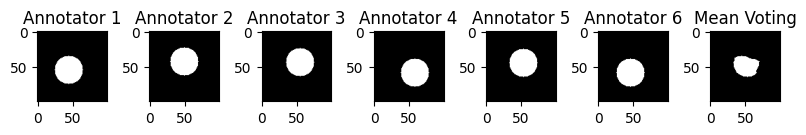

,metrics,annotator 1,annotator 2,annotator 3,annotator 4,annotator 5,annotator 6,mean voting
0,accuracy,0.909040,0.913960,0.918200,0.884840,0.924000,0.898200,0.937900
1,precision,0.638186,0.657757,0.674622,0.541925,0.697693,0.595068,0.587510
2,recall,0.638186,0.657757,0.674622,0.541925,0.697693,0.595068,0.878121
3,f1,0.638186,0.657757,0.674622,0.541925,0.697693,0.595068,0.704004
4,dice,0.638186,0.657757,0.674622,0.541925,0.697693,0.595068,0.704004
5,kappa,0.586167,0.608551,0.627842,0.476067,0.654230,0.536850,0.670832
6,jaccard,0.480937,0.519914,0.545578,0.373894,0.569198,0.441370,0.548328


In [92]:
import pandas as pd
from sklearn.metrics import (
    cohen_kappa_score,
    jaccard_score,
    f1_score,
    accuracy_score,
    precision_score,
    recall_score,
)
import numpy as np
import matplotlib.pyplot as plt


import pandas as pd

data = {
    'metrics': ['accuracy', 'precision', 'recall', 'f1','dice','kappa','jaccard']
}

df = pd.DataFrame(data)


# Iteracja przez adnotatorów jako "ground truth"
for i in range(num_annotators):
    ground_truth_annotation = annotations[i]
    kappa_scores = []
    jaccard_scores = []
    f1_scores = []
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    dice_scores = []


    # Porównywanie innych adnotatorów do "ground truth"
    for j in range(num_annotators):
        if i != j:  # Pomijamy porównywanie adnotatora z samym sobą
            annotator_annotation = annotations[j]

            kappa = cohen_kappa_score(ground_truth_annotation.flatten(), annotator_annotation.flatten())
            jaccard = jaccard_score(ground_truth_annotation.flatten(), annotator_annotation.flatten())
            f1 = f1_score(ground_truth_annotation.flatten(), annotator_annotation.flatten())
            accuracy = accuracy_score(ground_truth_annotation.flatten(), annotator_annotation.flatten())
            precision = precision_score(ground_truth_annotation.flatten(), annotator_annotation.flatten())
            recall = recall_score(ground_truth_annotation.flatten(), annotator_annotation.flatten())
            dice = dice_score(ground_truth_annotation.flatten(), annotator_annotation.flatten())

            kappa_scores.append(kappa)
            jaccard_scores.append(jaccard)
            f1_scores.append(f1)
            accuracy_scores.append(accuracy)
            precision_scores.append(precision)
            recall_scores.append(recall)
            dice_scores.append(dice)
    
    average_kappa_score = np.mean(kappa_scores)
    average_jaccard_score = np.mean(jaccard_scores)
    average_f1_score = np.mean(f1_scores)
    average_accuracy_score = np.mean(accuracy_scores)
    average_precision_score = np.mean(precision_scores)
    average_recall_score = np.mean(recall_scores)
    average_dice_score = np.mean(dice_scores)

    df.loc[df['metrics'] == 'f1', f'annotator {i+1}'] = average_f1_score
    df.loc[df['metrics'] == 'kappa', f'annotator {i+1}'] = average_kappa_score
    df.loc[df['metrics'] == 'jaccard', f'annotator {i+1}'] = average_jaccard_score
    df.loc[df['metrics'] == 'accuracy', f'annotator {i+1}'] = average_accuracy_score
    df.loc[df['metrics'] == 'precision', f'annotator {i+1}'] = average_precision_score
    df.loc[df['metrics'] == 'recall', f'annotator {i+1}'] = average_recall_score
    df.loc[df['metrics'] == 'dice', f'annotator {i+1}'] = average_recall_score


# Wykonanie średniego głosowania dla segmentacji obrazu
mean_voting_result = np.mean(annotations, axis=0)
binary_mean_voting_result = (mean_voting_result > 0.5).astype(int)
ground_truth_annotation = binary_mean_voting_result  

kappa_scores = []
jaccard_scores = []
f1_scores = []
accuracy_scores = []
precision_scores = []
recall_scores = []
dice_scores = []

for j in range(num_annotators):
        annotator_annotation = annotations[j]

        kappa = cohen_kappa_score(ground_truth_annotation.flatten(), annotator_annotation.flatten())
        jaccard = jaccard_score(ground_truth_annotation.flatten(), annotator_annotation.flatten())
        f1 = f1_score(ground_truth_annotation.flatten(), annotator_annotation.flatten())
        accuracy = accuracy_score(ground_truth_annotation.flatten(), annotator_annotation.flatten())
        precision = precision_score(ground_truth_annotation.flatten(), annotator_annotation.flatten())
        recall = recall_score(ground_truth_annotation.flatten(), annotator_annotation.flatten())
        dice = dice_score(ground_truth_annotation.flatten(), annotator_annotation.flatten())

        kappa_scores.append(kappa)
        jaccard_scores.append(jaccard)
        f1_scores.append(f1)
        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        dice_scores.append(dice)
    
average_kappa_score = np.mean(kappa_scores)
average_jaccard_score = np.mean(jaccard_scores)
average_f1_score = np.mean(f1_scores)
average_accuracy_score = np.mean(accuracy_scores)
average_precision_score = np.mean(precision_scores)
average_recall_score = np.mean(recall_scores)
average_dice_score = np.mean(dice_scores)

df.loc[df['metrics'] == 'f1', 'mean voting'] = average_f1_score
df.loc[df['metrics'] == 'kappa', 'mean voting'] = average_kappa_score
df.loc[df['metrics'] == 'jaccard', 'mean voting'] = average_jaccard_score
df.loc[df['metrics'] == 'accuracy', 'mean voting'] = average_accuracy_score
df.loc[df['metrics'] == 'precision', 'mean voting'] = average_precision_score
df.loc[df['metrics'] == 'recall', 'mean voting'] = average_recall_score
df.loc[df['metrics'] == 'dice', 'mean voting'] = average_dice_score

# Wyświetlenie adnotacji adnotatorów
plt.figure(figsize=(8, 4))
for i, annotation in enumerate(annotations, start=1):
    plt.subplot(1, num_annotators+1, i)
    plt.imshow(annotation, cmap='gray')
    plt.title(f'Annotator {i}')
plt.subplot(1,num_annotators+1,num_annotators+1)    
plt.imshow(binary_mean_voting_result, cmap='gray')
plt.title('Mean Voting')

plt.tight_layout()
plt.show()
# Wyświetlenie wyników
df


/tmp/ipykernel_6765/3852279173.py:21: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  most_common_label = mode(pixel_annotations).mode[0]  # Wybierz najczęściej występującą etykietę


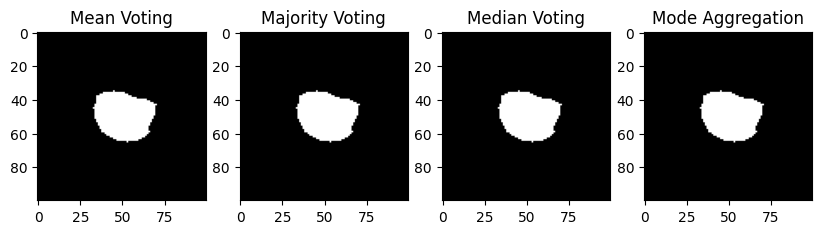

In [93]:
from scipy.stats import mode

# Wykonanie średniego głosowania dla segmentacji obrazu
mean_voting_result = np.mean(annotations, axis=0)
binary_mean_voting_result = (mean_voting_result > 0.5).astype(int)
# Wykonaj majority voting
majority_voting = np.round(np.mean(annotations, axis=0))

# Wykonaj median voting
median_voting = np.median(annotations, axis=0)
median_voting = np.round(median_voting)
#Średnie ważone
## Uzupełnić kod
#Mode Agregation

mode_aggregation = np.zeros_like(annotations[0])  # Inicjalizacja wynikowego obrazu

for i in range(image_size[0]):
    for j in range(image_size[1]):
        pixel_annotations = [annotation[i, j] for annotation in annotations]
        most_common_label = mode(pixel_annotations).mode[0]  # Wybierz najczęściej występującą etykietę
        mode_aggregation[i, j] = most_common_label



# Wyświetl obraz wynikowy
plt.figure(figsize=(10, 8))
plt.subplot(1,4,1)
plt.imshow(binary_mean_voting_result, cmap='gray')
plt.title('Mean Voting')
plt.subplot(1,4,2)
plt.imshow(majority_voting, cmap='gray')
plt.title("Majority Voting")
plt.subplot(1,4,3)
plt.imshow(median_voting, cmap='gray')
plt.title("Median Voting")
plt.subplot(1,4,4)
plt.imshow(mode_aggregation, cmap='gray')
plt.title("Mode Aggregation")
plt.show()




# Analiza spójności

Cohen's Kappa Matrix:
[[0.         0.53502977 0.49135351 0.51501149 0.53957938 0.84986284]
 [0.53502977 0.         0.84986284 0.37033386 0.86806129 0.41946966]
 [0.49135351 0.84986284 0.         0.45131693 0.94813444 0.39854145]
 [0.51501149 0.37033386 0.45131693 0.         0.47133522 0.57233658]
 [0.53957938 0.86806129 0.94813444 0.47133522 0.         0.44403756]
 [0.84986284 0.41946966 0.39854145 0.57233658 0.44403756 0.        ]]
Jaccard Coefficient Matrix:
[[0.         0.4219457  0.38436123 0.40446927 0.42597845 0.76793249]
 [0.4219457  0.         0.76793249 0.28989225 0.79315264 0.32664908]
 [0.38436123 0.76793249 0.         0.3516129  0.91324201 0.31074035]
 [0.40446927 0.28989225 0.3516129  0.         0.36779108 0.45570353]
 [0.42597845 0.79315264 0.91324201 0.36779108 0.         0.34582441]
 [0.76793249 0.32664908 0.31074035 0.45570353 0.34582441 0.        ]]


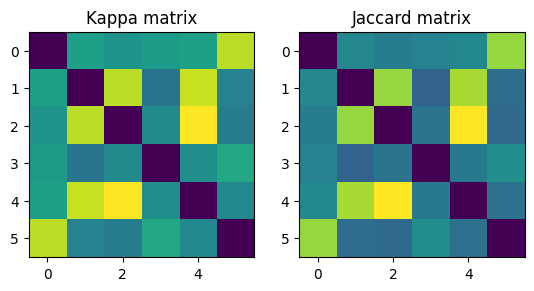

In [94]:
from sklearn.metrics import cohen_kappa_score

# Oblicz macierz Cohen's Kappa dla wszystkich par adnotatorów
kappa_matrix = np.zeros((num_annotators, num_annotators))

for i in range(num_annotators):
    for j in range(i + 1, num_annotators):
        kappa = cohen_kappa_score(annotations[i].flatten(), annotations[j].flatten())
        kappa_matrix[i, j] = kappa
        kappa_matrix[j, i] = kappa


# Oblicz macierz współczynników Jaccarda między adnotacjami adnotatorów
jaccard_matrix = np.zeros((num_annotators, num_annotators))

for i in range(num_annotators):
    for j in range(i + 1, num_annotators):
        jaccard = jaccard_score(annotations[i].flatten(), annotations[j].flatten())
        jaccard_matrix[i, j] = jaccard
        jaccard_matrix[j, i] = jaccard        

# Wyświetl macierz spójności
print("Cohen's Kappa Matrix:")
print(kappa_matrix)

print("Jaccard Coefficient Matrix:")
print(jaccard_matrix)

plt.subplot(1,2,1)
plt.imshow(kappa_matrix)
plt.title("Kappa matrix")
plt.subplot(1,2,2)
plt.imshow(jaccard_matrix)
plt.title("Jaccard matrix")
plt.show()